# 住宅価格の予測

Week3で使用したアイオワ州エイムズ市の住宅価格データセットを使い、回帰問題を解く練習をします。


79種類の特徴量（説明変数）を活用し、住宅価格の数値を推測する問題が設定できます。こういった連続値のものを推測する問題を回帰問題と呼びます。

[House Prices](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

Week3同様にKaggleからデータセットをダウンロードしてください。train.csvのみを使用します。

[House Prices](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.shape

(1460, 81)

In [4]:
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


### 練習のための準備

このデータセットには79種類の特徴量（目的変数）がありますが、Week3で探索して分かったように様々なタイプのデータ含まれています。これをどう前処理するかということは機械学習において重要な箇所ですが、今回は回帰問題の学習や評価の練習を優先するため、説明変数(特徴量)`GrLivArea`と`YearBuilt`の2つだけを利用することにします。

### 【問題1】練習のために特徴量の選択
データセットを読み込んだ後、説明変数GrLivAreaとYearBuilt、目的変数SalePriceをそれぞれ抜き出してください。

In [5]:
X = pd.DataFrame(train, columns = ['GrLivArea', 'YearBuilt'])
np.set_printoptions(threshold=10)
print(X)
X.shape

      GrLivArea  YearBuilt
0          1710       2003
1          1262       1976
2          1786       2001
3          1717       1915
4          2198       2000
...         ...        ...
1455       1647       1999
1456       2073       1978
1457       2340       1941
1458       1078       1950
1459       1256       1965

[1460 rows x 2 columns]


(1460, 2)

In [6]:
y = pd.DataFrame(train, columns = ['SalePrice'])
y.shape

(1460, 1)

### 【問題2】線形回帰による推定と評価
データを簡単に分析、前処理し、 **線形回帰**による学習、推定、評価、可視化までの一連の流れを作成・実行してください。

[LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)


評価のための指標値は回帰問題では**平均二乗誤差（Mean Squared Error, MSE）**を使うことが一般的です。

[MSE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)

可視化は横軸にある特徴量、縦軸に推測した住宅価格といった方法で行えます。
scatterを用いて、実際のデータと予測結果を比較できるグラフを作りましょう。

In [7]:
# 欠損値の確認
X.isnull().sum()

GrLivArea    0
YearBuilt    0
dtype: int64

In [8]:
# 欠損値の確認
y.isnull().sum()

SalePrice    0
dtype: int64

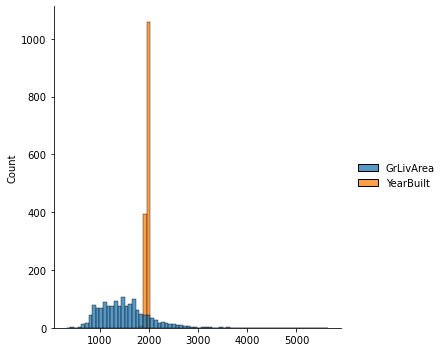

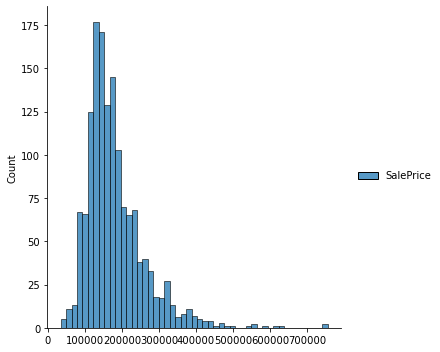

In [9]:
#分布の確認
sns.displot(X, kde=False)
sns.displot(y, kde=False)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
#データを変換
X =X.values
y = y.values
y = y.reshape(-1)

#データを分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("X", type(X))
print("y", type(y))
print("y.shape", y.shape)
print("X_train : ", X_train.shape, "X_test : ", X_test.shape)
print("y_train : ", y_train.shape, "y_test : ", y_test.shape)


X <class 'numpy.ndarray'>
y <class 'numpy.ndarray'>
y.shape (1460,)
X_train :  (1095, 2) X_test :  (365, 2)
y_train :  (1095,) y_test :  (365,)


In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
# 標準化

scaler = StandardScaler()

scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

print("X_train_std", X_train_std.shape)
print("X_test_std", X_test_std.shape)
print("X_train_std.mean", X_train_std.mean(axis=0))# 平均
print("X_train_std.std", X_train_std.std(axis=0))# 分散

X_train_std (1095, 2)
X_test_std (365, 2)
X_train_std.mean [-1.35425664e-16 -7.55357218e-16]
X_train_std.std [1. 1.]


In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
# 学習、推定

linear = LinearRegression()

linear.fit(X_train_std, y_train)
y_pred = linear.predict(X_test_std)

np.set_printoptions(threshold=10)
y_pred

array([130445.81129484, 306448.48211547,  88741.8324304 , ...,
       273133.55871006, 235276.23501721, 137452.40556876])

In [16]:
#評価、MSEの算出
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

2314465092.7320137

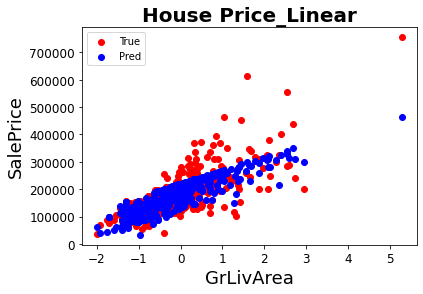

In [17]:
x_1 = X_test_std[:, 0]# GrLivAreaでラベル1でTure
x_2 = X_test_std[:, 0]# GrLivAreaでラベル2でPred

y_1 = y_test# SalePriceでラベル1
y_2 = y_pred# SalePriceでラベル2

# 散布図を描画
plt.title("House Price_Linear", size=20, weight='heavy')
plt.xlabel("GrLivArea", size=18)
plt.ylabel("SalePrice", size=18)
plt.tick_params(labelsize=12)
#plt.scatter(x_0, y_0, c='green')
plt.scatter(x_1, y_1, c='red', label='True')
plt.scatter(x_2, y_2, c='blue', label='Pred')
plt.legend()

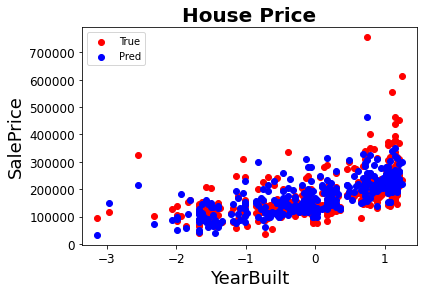

In [18]:
x_1 = X_test_std[:, 1]# YearBuiltでラベル1
x_2 = X_test_std[:, 1]# YearBuiltでラベル2

y_1 = y_test# SalePriceでラベル1
y_2 = y_pred# SalePriceでラベル2

# 散布図を描画
plt.title("House Price", size=20, weight='heavy')
plt.xlabel("YearBuilt", size=18)
plt.ylabel("SalePrice", size=18)
plt.tick_params(labelsize=12)
#plt.scatter(x_0, y_0, c='green')
plt.scatter(x_1, y_1, c='red', label='True')
plt.scatter(x_2, y_2, c='blue', label='Pred')
plt.legend()

### 【問題3】手法の比較

以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と可視化した図を利用して結果を簡単に考察してください。どの手法がどの指標値が良かったかや、どういった図になっていたかを述べてください。

1. 線形回帰
2. SVM
3. 決定木
4. ランダムフォレスト

SVM、決定木、ランダムフォレストは分類問題でも使用した手法ですが、回帰問題用のライブラリはそれぞれ専用のものに分かれています。

[SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)

[決定木](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

[ランダムフォレスト](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

線形回帰は問題3にて終了しているので表のみ作成とする。

#### 1. 線形回帰 

In [19]:
# 表の作成

pred_df = pd.DataFrame({'LinearRegression' : [mean_squared_error(y_test, y_pred)]}, 
                                               index = ['MSE'])

In [20]:
pred_df

,LinearRegression
MSE,2.314465e+09


#### 2. SVM

In [21]:
#学習、推定
from sklearn.svm import SVR
svm = SVR()
svm.fit(X_train_std, y_train)
y_pred_svm = svm.predict(X_test_std)
np.set_printoptions(threshold=10)
y_pred_svm

array([164844.89487193, 165181.29359015, 164836.20308932, ...,
       165282.71638756, 165288.67710752, 164859.8115595 ])

In [22]:
# 評価

mean_squared_error(y_test, y_pred_svm)

7169223057.829623

In [23]:
# 表作成用

pred_df = pred_df.assign(SVM = [mean_squared_error(y_test, y_pred_svm)])

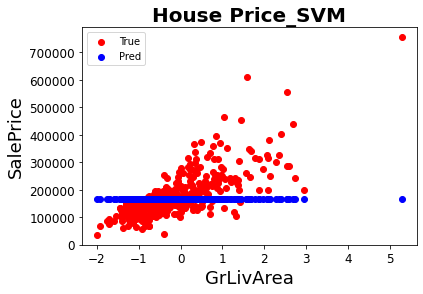

In [24]:
#可視化

x_1 = X_test_std[:, 0]# GrLivArea
x_2 = X_test_std[:, 0]# GrLivArea

y_1 = y_test# SalePrice
y_2 = y_pred_svm# SalePrice

# 散布図を描画
plt.title("House Price_SVM", size=20, weight='heavy')
plt.xlabel("GrLivArea", size=18)
plt.ylabel("SalePrice", size=18)
plt.tick_params(labelsize=12)
#plt.scatter(x_0, y_0, c='green')
plt.scatter(x_1, y_1, c='red', label='True')
plt.scatter(x_2, y_2, c='blue', label='Pred')
plt.legend()

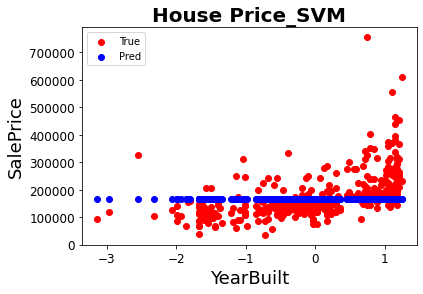

In [25]:
x_1 = X_test_std[:, 1]# YearBuiltでTrue
x_2 = X_test_std[:, 1]# YearBuiltでPred

y_1 = y_test# SalePriceでTrue
y_2 = y_pred_svm# SalePriceでPred

# 散布図を描画
plt.title("House Price_SVM", size=20, weight='heavy')
plt.xlabel("YearBuilt", size=18)
plt.ylabel("SalePrice", size=18)
plt.tick_params(labelsize=12)
plt.scatter(x_1, y_1, c='red', label='True')
plt.scatter(x_2, y_2, c='blue', label='Pred')
plt.legend()

#### 3. 決定木

In [26]:
#学習、推定
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
tree =  DecisionTreeRegressor()
tree.fit(X_train_std, y_train)
y_pred_tree = tree.predict(X_test_std)
y_pred_tree

array([132000., 336000.,  88000., ..., 313000., 221000., 155000.])

In [27]:
#評価
mean_squared_error(y_test, y_pred_tree)

2302522981.885236

In [28]:
#表作成用
pred_df = pred_df.assign(Dicision_Tree=[mean_squared_error(y_test, y_pred_tree)])

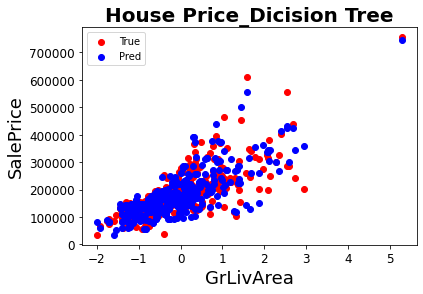

In [29]:
#可視化

x_1 = X_test_std[:, 0]# GrLivArea
x_2 = X_test_std[:, 0]# GrLivArea

y_1 = y_test# SalePrice
y_2 = y_pred_tree# SalePrice

# 散布図を描画
plt.title("House Price_Dicision Tree", size=20, weight='heavy')
plt.xlabel("GrLivArea", size=18)
plt.ylabel("SalePrice", size=18)
plt.tick_params(labelsize=12)
#plt.scatter(x_0, y_0, c='green')
plt.scatter(x_1, y_1, c='red', label='True')
plt.scatter(x_2, y_2, c='blue', label='Pred')
plt.legend()

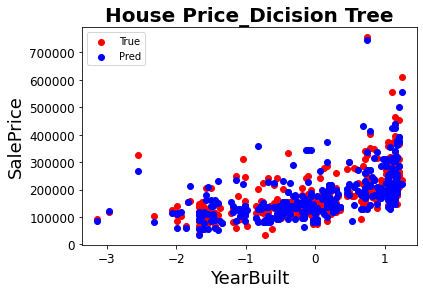

In [30]:
x_1 = X_test_std[:, 1]# YearBuiltでTrue
x_2 = X_test_std[:, 1]# YearBuiltでPred

y_1 = y_test# SalePriceでTrue
y_2 = y_pred_tree# SalePriceでPred

# 散布図を描画
plt.title("House Price_Dicision Tree", size=20, weight='heavy')
plt.xlabel("YearBuilt", size=18)
plt.ylabel("SalePrice", size=18)
plt.tick_params(labelsize=12)
plt.scatter(x_1, y_1, c='red', label='True')
plt.scatter(x_2, y_2, c='blue', label='Pred')
plt.legend()

#### 4. ランダムフォレスト

In [31]:
#学習、推定
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train_std, y_train)
y_pred_rf = rf.predict(X_test_std)
y_pred_rf

array([144301.25, 329765.  ,  97062.  , ..., 275240.52, 219182.5 ,
       155763.5 ])

In [32]:
#評価
mean_squared_error(y_test, y_pred_rf)

1639961421.460401

In [33]:
#表作成用
pred_df = pred_df.assign(RandomForest=[mean_squared_error(y_test, y_pred_rf)])

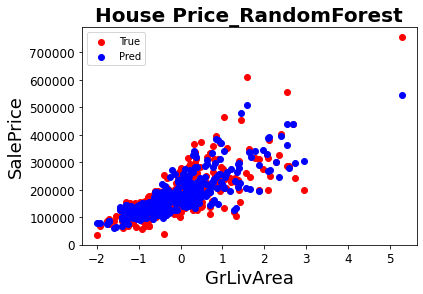

In [34]:
#可視化

x_1 = X_test_std[:, 0]# GrLivArea
x_2 = X_test_std[:, 0]# GrLivArea

y_1 = y_test# SalePrice
y_2 = y_pred_rf# SalePrice

# 散布図を描画
plt.title("House Price_RandomForest", size=20, weight='heavy')
plt.xlabel("GrLivArea", size=18)
plt.ylabel("SalePrice", size=18)
plt.tick_params(labelsize=12)
#plt.scatter(x_0, y_0, c='green')
plt.scatter(x_1, y_1, c='red', label='True')
plt.scatter(x_2, y_2, c='blue', label='Pred')
plt.legend()

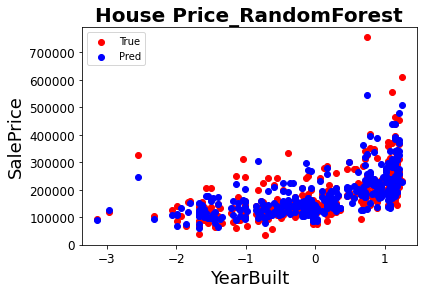

In [35]:
x_1 = X_test_std[:, 1]# YearBuiltでTrue
x_2 = X_test_std[:, 1]# YearBuiltでPred

y_1 = y_test# SalePriceでTrue
y_2 = y_pred_rf# SalePriceでPred

# 散布図を描画
plt.title("House Price_RandomForest", size=20, weight='heavy')
plt.xlabel("YearBuilt", size=18)
plt.ylabel("SalePrice", size=18)
plt.tick_params(labelsize=12)
plt.scatter(x_1, y_1, c='red', label='True')
plt.scatter(x_2, y_2, c='blue', label='Pred')
plt.legend()

In [36]:
#表出力
pred_df

,LinearRegression,SVM,Dicision_Tree,RandomForest
MSE,2.314465e+09,7.169223e+09,2.302523e+09,1.639961e+09


#### 【結果、考察】
MSEの値が一番小さく精度が高い物はランダムフォレストであった。
散布図はSVMの予測が上手くできていない様が描かれており、SVMの学習が上手くいってないように思う。今回はパラメーターの調整ができていない為なのか、次回以降パラメーターを割り当てて学習させて見たいと思う。SVMはMSEも他に比べて大きかった。

### 【問題4】（アドバンス課題）他の特徴量も使用しての学習

ここまでは練習のために2つの特徴量だけを使いましたが、他の特徴量を加えるとどのようになるか検証してください。どう選択・加工するかにはデータ分析が重要になってきます。

KaggleのNotebooksも参考にできます。

[House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/kernels?competitionId=5407&sortBy=voteCount)

まずは目的変数(SalePrice)と相関性の高いものを抜き出してみる。

In [37]:
train_corr = train.corr()

train_corr_list = train_corr['SalePrice'].sort_values(ascending=False)
train_corr_list[1:11]

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

GrLivArea以外の上位３つのOverallQual、GarageCars、GarageAreaについて欠損値の有無を調べてみる。

In [38]:
X1 = pd.DataFrame(train, columns=['OverallQual', 'GarageCars', 'GarageArea'])
X1

,OverallQual,GarageCars,GarageArea
0,7,2,548
1,6,2,460
2,7,2,608
3,7,3,642
4,8,3,836
...,...,...,...
1455,6,2,460
1456,6,2,500
1457,7,1,252
1458,5,1,240


In [39]:
# 欠損値の確認
X1.isnull().sum()

OverallQual    0
GarageCars     0
GarageArea     0
dtype: int64

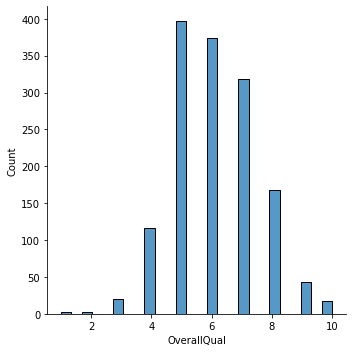

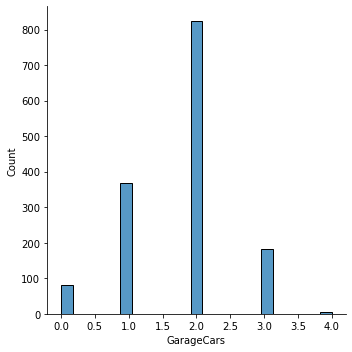

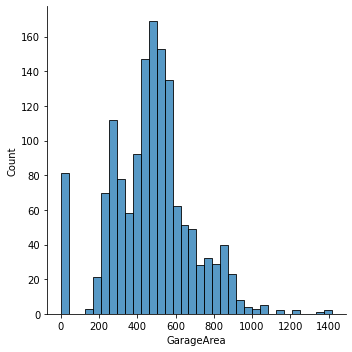

In [40]:
# 分布の確認
sns.displot(X1['OverallQual'], kde=False)
sns.displot(X1['GarageCars'], kde=False)
sns.displot(X1['GarageArea'], kde=False)

GrLivArea、YearBuiltの他に、OverallQual、GarageCars、GarageAreaの３つの特徴量も足した、合計5つの特徴量で行ってみる。

In [41]:
print(type(X))
print(type(X1))

<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>


In [42]:
X1 = X1.values
type(X1)

numpy.ndarray

In [43]:
X_x = np.concatenate([X, X1], axis=1)
print(X_x)
print(X_x.shape)

[[1710 2003    7    2  548]
 [1262 1976    6    2  460]
 [1786 2001    7    2  608]
 ...
 [2340 1941    7    1  252]
 [1078 1950    5    1  240]
 [1256 1965    5    1  276]]
(1460, 5)


In [44]:
#データを分割
X_train, X_test = train_test_split(X_x, test_size=0.25, random_state=42)

print("X", type(X))
print("X_train : ", X_train.shape, "X_test : ", X_test.shape)

X <class 'numpy.ndarray'>
X_train :  (1095, 5) X_test :  (365, 5)


In [45]:
# 標準化
scaler = StandardScaler()

scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

print("X_train_std", X_train_std.shape)
print("X_test_std", X_test_std.shape)
print("X_train_std.mean", X_train_std.mean(axis=0))# 平均
print("X_train_std.std", X_train_std.std(axis=0))# 分散

X_train_std (1095, 5)
X_test_std (365, 5)
X_train_std.mean [-1.35425664e-16 -7.55357218e-16 -2.97276156e-16 -3.42698979e-17
  8.43566718e-17]
X_train_std.std [1. 1. 1. 1. 1.]


In [46]:
#線形回帰で学習、推定、評価
linear = LinearRegression()

linear.fit(X_train_std, y_train)
y_pred = linear.predict(X_test_std)

np.set_printoptions(threshold=10)
print(y_pred)

print(mean_squared_error(y_test, y_pred))

#表作成用
pred_df = pred_df.assign(Linear_5=[mean_squared_error(y_test, y_pred)])

[136824.76768538 299397.737679   111072.15110271 ... 276538.01159162
 228441.6545574  120969.9367397 ]
1614956770.3081925


In [47]:
#SVMで学習、推定、評価

svm = SVR()
svm.fit(X_train_std, y_train)
y_pred_svm = svm.predict(X_test_std)
np.set_printoptions(threshold=10)
print(y_pred_svm)
print(mean_squared_error(y_test, y_pred_svm))

#表作成用
pred_df = pred_df.assign(SVM_5=[mean_squared_error(y_test, y_pred_svm)])

[164916.91991281 165230.07810474 164924.83969014 ... 165285.7763472
 165257.55410089 164887.20428062]
7172538565.079906


In [48]:
#決定木で学習、推定、評価

tree =  DecisionTreeRegressor()
tree.fit(X_train_std, y_train)
y_pred_tree = tree.predict(X_test_std)
print(y_pred_tree)
print(mean_squared_error(y_test, y_pred_tree))

#表作成用
pred_df = pred_df.assign(DecisionTree_5=[mean_squared_error(y_test, y_pred_tree)])

[140000. 336000.  85000. ... 250000. 176500. 125000.]
1595330510.992694


In [49]:
#ランダムフォレストで学習、推定
rf = RandomForestRegressor()
rf.fit(X_train_std, y_train)
y_pred_rf = rf.predict(X_test_std)
print(y_pred_rf)
print(mean_squared_error(y_test, y_pred_rf))

#表作成用
pred_df = pred_df.assign(RandomForest_5=[mean_squared_error(y_test, y_pred_rf)])

[137415.   313104.11 104957.   ... 263132.24 201528.59 138094.  ]
1110820097.4923046


**ランダムフォレストが最もMSEが小さかったので可視化してみる**

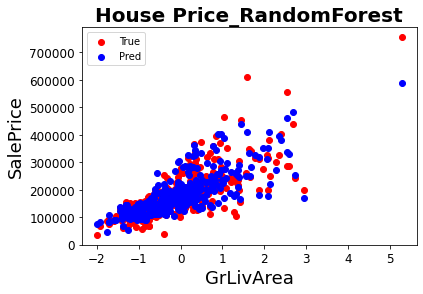

In [50]:
#可視化

x_1 = X_test_std[:, 0]# GrLivArea
x_2 = X_test_std[:, 0]# GrLivArea

y_1 = y_test# SalePrice
y_2 = y_pred_rf# SalePrice

# 散布図を描画
plt.title("House Price_RandomForest", size=20, weight='heavy')
plt.xlabel("GrLivArea", size=18)
plt.ylabel("SalePrice", size=18)
plt.tick_params(labelsize=12)
#plt.scatter(x_0, y_0, c='green')
plt.scatter(x_1, y_1, c='red', label='True')
plt.scatter(x_2, y_2, c='blue', label='Pred')
plt.legend()

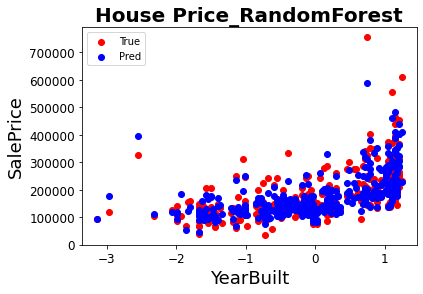

In [51]:
#可視化

x_1 = X_test_std[:, 1]# YearBuilt
x_2 = X_test_std[:, 1]#YearBuilt

y_1 = y_test# SalePrice
y_2 = y_pred_rf# SalePrice

# 散布図を描画
plt.title("House Price_RandomForest", size=20, weight='heavy')
plt.xlabel("YearBuilt", size=18)
plt.ylabel("SalePrice", size=18)
plt.tick_params(labelsize=12)
#plt.scatter(x_0, y_0, c='green')
plt.scatter(x_1, y_1, c='red', label='True')
plt.scatter(x_2, y_2, c='blue', label='Pred')
plt.legend()

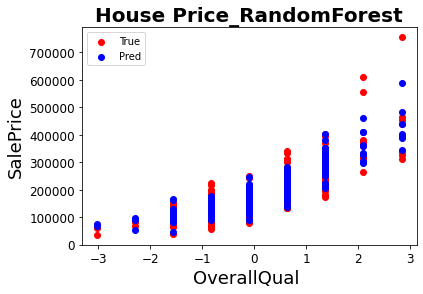

In [52]:
#可視化

x_1 = X_test_std[:, 2]# OverallQual 
x_2 = X_test_std[:, 2]#OverallQual 

y_1 = y_test# SalePrice
y_2 = y_pred_rf# SalePrice

# 散布図を描画
plt.title("House Price_RandomForest", size=20, weight='heavy')
plt.xlabel("OverallQual ", size=18)
plt.ylabel("SalePrice", size=18)
plt.tick_params(labelsize=12)
#plt.scatter(x_0, y_0, c='green')
plt.scatter(x_1, y_1, c='red', label='True')
plt.scatter(x_2, y_2, c='blue', label='Pred')
plt.legend()

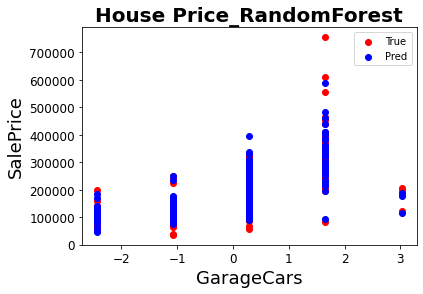

In [53]:
#可視化

x_1 = X_test_std[:, 3]# GarageCars
x_2 = X_test_std[:, 3]#GarageCars

y_1 = y_test# SalePrice
y_2 = y_pred_rf# SalePrice

# 散布図を描画
plt.title("House Price_RandomForest", size=20, weight='heavy')
plt.xlabel("GarageCars", size=18)
plt.ylabel("SalePrice", size=18)
plt.tick_params(labelsize=12)
#plt.scatter(x_0, y_0, c='green')
plt.scatter(x_1, y_1, c='red', label='True')
plt.scatter(x_2, y_2, c='blue', label='Pred')
plt.legend()

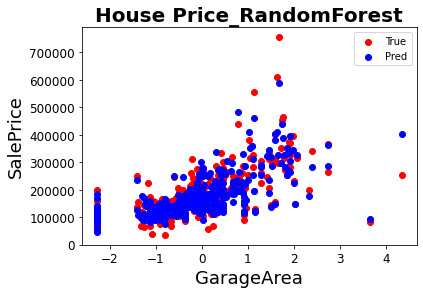

In [54]:
#可視化

x_1 = X_test_std[:, 4]# GarageArea
x_2 = X_test_std[:, 4]# GarageArea

y_1 = y_test# SalePrice
y_2 = y_pred_rf# SalePrice

# 散布図を描画
plt.title("House Price_RandomForest", size=20, weight='heavy')
plt.xlabel("GarageArea", size=18)
plt.ylabel("SalePrice", size=18)
plt.tick_params(labelsize=12)
#plt.scatter(x_0, y_0, c='green')
plt.scatter(x_1, y_1, c='red', label='True')
plt.scatter(x_2, y_2, c='blue', label='Pred')
plt.legend()

In [55]:
#表出力
pred_df

,LinearRegression,SVM,Dicision_Tree,RandomForest,Linear_5,SVM_5,DecisionTree_5,RandomForest_5
MSE,2.314465e+09,7.169223e+09,2.302523e+09,1.639961e+09,1.614957e+09,7.172539e+09,1.595331e+09,1.110820e+09


#### 【結果、考察】
今回はSalePriceとの相関が高そうな5つの特徴量をピックアップして、各モデルにて学習を行わせてみた。その結果、SVM以外全てのモデルでMSEの減少がみられた。

この事からも、目的変数に相関性の高い特徴量の数を多く学ばせることで、推定の精度が高まることが言えそうである。